In [1]:
import numpy as np
import random
import sys, os
import matplotlib.pyplot as plt
import pandas as pd
a = sys.path.append('../modules/') # endereco das funcoes implementadas por voce!
from datetime import datetime
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators_array, aux_operators_array, graphs_and_dist
import warnings
warnings.filterwarnings("ignore")
#import test_operators_12_02_2021_sem_lambda as top
#import tes_operators_22_02_2021_KM as top
#import test_operators_11_02_2021 as top
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

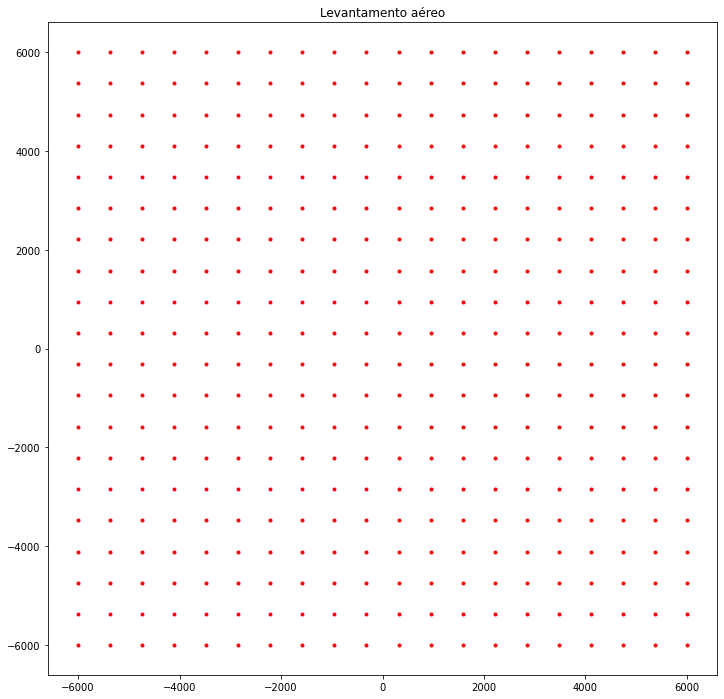

In [3]:
acquisition = {'nx': 20,
                  'ny': 20,
                  'xmin': -6000,
                  'xmax': 6000,
                  'ymin': -6000,
                  'ymax': 6000,
                  'z': -50.0,
                  'color': '.r'}


x, y, X, Y, Z = plot_3D.create_aquisicao(**acquisition)

os.chdir('/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Logfile')
data_cubo = pd.read_table('04_10_2021_17_54/data_mag.cvs', sep =',')
anomaly_cubo = np.reshape(np.array(data_cubo['Anomalia Magnética(nT)']), (20,20))

In [4]:
final_ind_lamb0 = []
os.chdir('/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Testes_com_curve_L')
data_final_ind_lamb0 = pd.read_table('05_10_2021_20_36_congresso/final_ind.cvs', sep =',')
final_lamb0 = np.reshape(np.array(data_final_ind_lamb0), (20,3))
#print(np.shape(final_lamb0))
final_ind_lamb0.append(final_lamb0)
#print(final_ind_lamb0)
#print(final_ind_lamb0)
I, D = 5.0, 70.0
#print(I)
anomaly_final_ind_lamb_0 = aux_operators_array.caculation_anomaly(X, Y, Z, I, D, final_ind_lamb0)
print(np.shape(anomaly_final_ind_lamb_0))

(1, 20, 20)


In [5]:
fit_, anomaly_final_lamb0 = Operators_array.fit_value(X, Y, Z, I, D, final_ind_lamb0, anomaly_cubo)
#print(np.shape(anomaly_cubo))
#print(np.shape(anomaly_final_lamb0))
#print(anomaly_final_lamb0)
#print('+++++++++++++++++++++++++')
#print(anomaly_cubo)
final = np.reshape(anomaly_final_ind_lamb_0, (20,20))

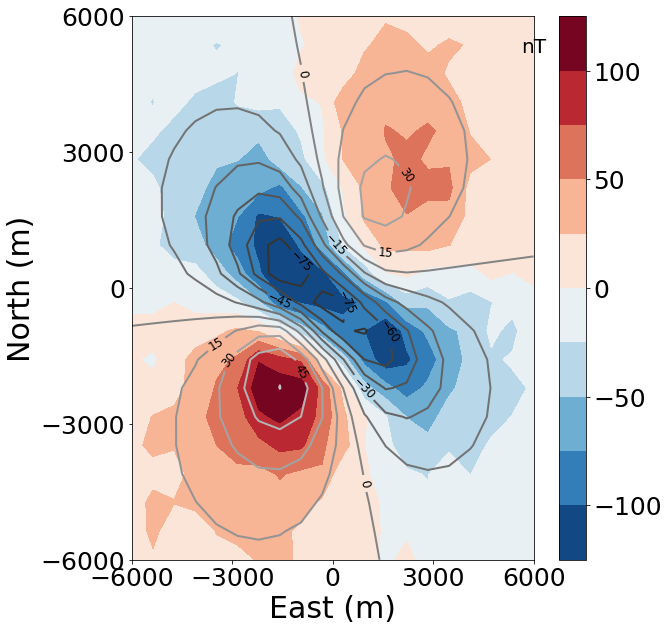

In [6]:
plt.figure(figsize=(9,10))
bolas = plt.contour(Y, X, final, levels = 10, cmap = 'gray', linewidths = 2, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
plt.clabel(bolas , inline=2, fontsize=12, colors = 'k')
cubo = plt.contourf(Y, X, anomaly_cubo, 10, cmap = plt.cm.RdBu_r, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#arrow = plt.arrow(0.0, 0.0, 1000.0*ptx, 1000.0*pty, width=50.0,head_width=250.0, length_includes_head = False, color = 'k')
#arrow1 = plt.arrow(0.0, 0.0, 1000.0*rptx, 1000.0*rpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'g')
#arrow2 = plt.arrow(0.0, 0.0, 1000.0*bptx, 1000.0*bpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'y')
#first_legend = plt.legend(handles=[cubo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, arrow1, arrow2], ['Vetor magnetização da fonte', 'Vetor magnetização do campo Regional', 'Vetor de magnetização do Campo estimado'], bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.title('Total Field Anomaly of the final subject(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 30)
plt.ylabel('North (m)', fontsize = 30)
plt.xticks(np.linspace(X.min(), X.max(), 5),fontsize = 25)
plt.yticks(np.linspace(X.min(), Y.max(), 5),fontsize = 25)
plt.text(6000,5200, 'nT', horizontalalignment = 'center', fontsize = 20)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()

In [7]:
residuo_anomaly = anomaly_cubo - final
res = np.reshape(residuo_anomaly, (400))
#print(res)

res_mu = np.mean(res)
res_sigma = np.std(res)

from scipy.stats import norm

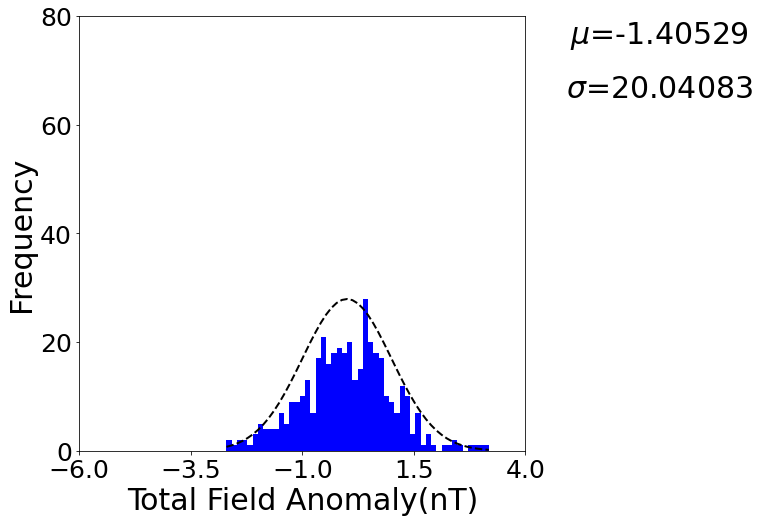

In [8]:
plt.figure(figsize=(8,8))
s = (res - res_mu) / res_sigma
s = np.ravel(s)
nbins = int(np.max(s) - np.min(s))
n, bins, patches = plt.hist(s, 50, facecolor = 'blue', alpha = 1.)
y_hist = norm.pdf(bins, np.mean(s), np.std(s))
plt.plot(bins, 70*y_hist, 'k--', linewidth = 2)
plt.xlabel('Total Field Anomaly(nT)', fontsize = 30)
plt.ylabel('Frequency', fontsize = 30)
plt.text(7,75, '$\mu$=%0.5f' % (res_mu), horizontalalignment = 'center', fontsize = 30)
plt.text(7,65, '$\sigma$=%0.5f' % (res_sigma), horizontalalignment = 'center', fontsize = 30)
plt.xticks(np.linspace(-6, 4, 5),fontsize = 25)
plt.yticks(np.linspace(0, 80, 5),fontsize = 25)
plt.show()

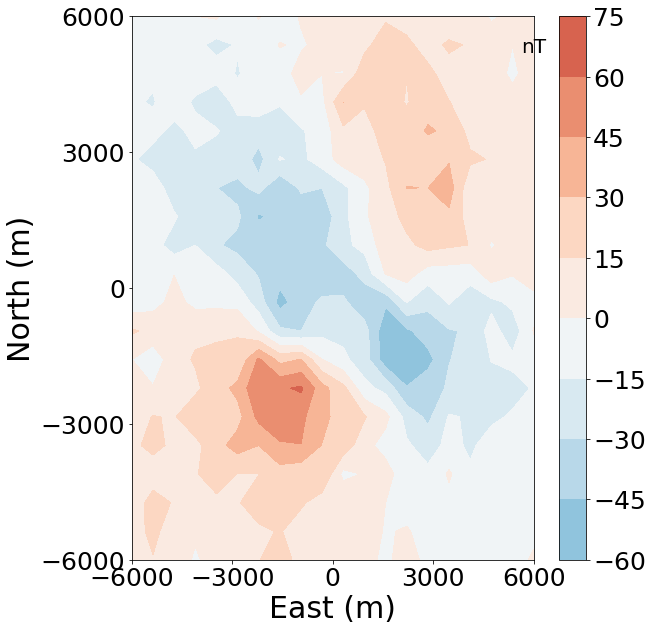

In [9]:
plt.figure(figsize=(9,10))
residuo = plt.contourf(Y, X, residuo_anomaly, 10, cmap = plt.cm.RdBu_r, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#arrow = plt.arrow(0.0, 0.0, 1000.0*ptx, 1000.0*pty, width=50.0,head_width=250.0, length_includes_head = False, color = 'k')
#arrow1 = plt.arrow(0.0, 0.0, 1000.0*rptx, 1000.0*rpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'g')
#arrow2 = plt.arrow(0.0, 0.0, 1000.0*bptx, 1000.0*bpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'y')
#first_legend = plt.legend(handles=[cubo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, arrow1, arrow2], ['Vetor magnetização da fonte', 'Vetor magnetização do campo Regional', 'Vetor de magnetização do Campo estimado'], bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.title('Total Field Anomaly of the final subject(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 30)
plt.ylabel('North (m)', fontsize = 30)
plt.xticks(np.linspace(X.min(), X.max(), 5),fontsize = 25)
plt.yticks(np.linspace(X.min(), Y.max(), 5),fontsize = 25)
plt.text(6000,5200, 'nT', horizontalalignment = 'center', fontsize = 20)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=25)
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()

# Plot 3D

In [10]:
def divide_param_dipolo(pop):
    coodX1 = []
    coodY1 = []
    coodZ1 = []
    incl1 = []
    decl1 = []
    mag1 = []

    for i in range(len(pop)-1):
        coodX1.append(pop[i,0])
        coodY1.append(pop[i,1])
        coodZ1.append(pop[i,2])
        incl1.append(pop[len(pop)-1,0])
        decl1.append(pop[len(pop)-1,1])
        mag1.append(pop[len(pop)-1,2])
    return coodX1, coodY1, coodZ1, incl1, decl1, mag1

coodX1, coodY1, coodZ1, incl1, decl1, mag1 = divide_param_dipolo(final_lamb0)

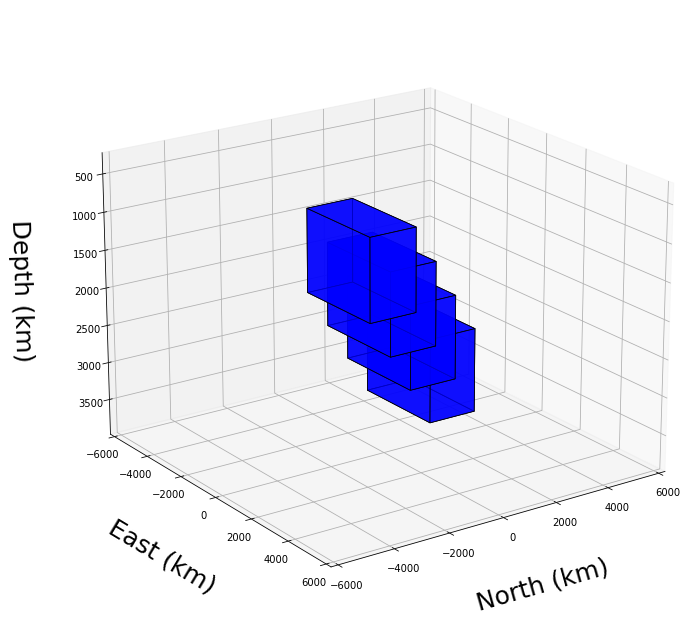

In [11]:
# coordenadas dos vertices (corners) do prisma, em metros:
y1,y2  = (-1700.0, 1700.0)
x1,x2 = (-1700.0, 0.0)
z1,z2  = (800.0, 1900.0)   # z eh positivo para baixo!
deltaz = 1000.0
deltay = 1500.0
deltax = 1500.0
incl = 'positivo'

dic = {'n': 4,
       'x': [x1, x2],
       'y': [y1, y2],
       'z': [z1, z2],
       'deltay': deltay,
       'deltaz': deltaz,
       'deltax': deltax,
       'incl': incl,
       'merg': 'x'}

pointx, pointy, pointz = plot_3D.creat_point(**dic)


dic1 = {'x': [pointx[0], pointx[1]],
        'y': [pointy[0], pointy[1]],
        'z': [pointz[0], pointz[1]]}

dic2 = {'x': [pointx[2], pointx[3]],
        'y': [pointy[2], pointy[3]],
        'z': [pointz[2], pointz[3]]}

dic3 = {'x': [pointx[4], pointx[5]],
        'y': [pointy[4], pointy[5]],
        'z': [pointz[4], pointz[5]]}

dic4 = {'x': [pointx[6], pointx[7]],
        'y': [pointy[6], pointy[7]],
        'z': [pointz[6], pointz[7]]}

'''dic5 = {'x': [pointx[8], pointx[9]],
        'y': [pointy[8], pointy[9]],
        'z': [pointz[8], pointz[9]]}'''
#----------------------------------------------------------------------------------------------------#
vert1 =  plot_3D.vert_point(dic1)
vert2 =  plot_3D.vert_point(dic2)
vert3 =  plot_3D.vert_point(dic3)
vert4 =  plot_3D.vert_point(dic4)
#vert5 =  plot_3D.vert_point(dic5)'''
#----------------------------------------------------------------------------------------------------#
color = 'b'
size = [9, 10]
view = [200,305]
#----------------------------------------------------------------------------------------------------#
prism_1 = plot_3D.plot_prism(vert1, color)
prism_2 = plot_3D.plot_prism(vert2, color)
prism_3 = plot_3D.plot_prism(vert3, color)
prism_4 = plot_3D.plot_prism(vert4, color)
#prism_5 = plot_3D.plot_prism(vert5, color)'''
#----------------------------------------------------------------------------------------------------#
prisma1 = {'n': 4,
         'prisma': [prism_1, prism_2,prism_3, prism_4]} #prism_5]}#, prism_2,prism_3]}

plot_3D.plot_obs_3d(prisma1, size, view, x, y, pointz)

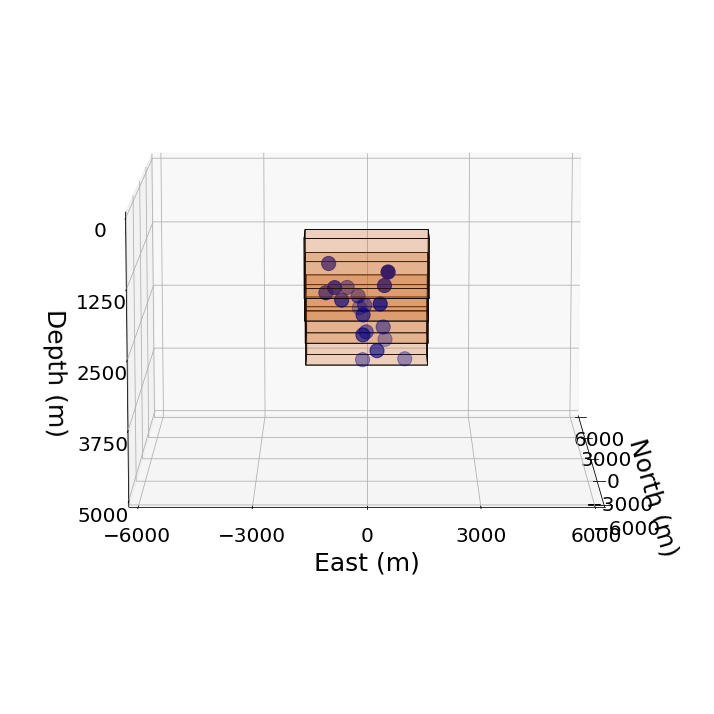

In [37]:
# Plot the main 3D source
figure = plt.figure(figsize=(10,10))

ax = figure.gca(projection = '3d')

fig01 = Poly3DCollection(vert1, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig01.set_facecolor('chocolate')
ax.add_collection3d(fig01)

fig02 = Poly3DCollection(vert2, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig02.set_facecolor('chocolate')
ax.add_collection3d(fig02)

fig03 = Poly3DCollection(vert3, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig03.set_facecolor('chocolate')
ax.add_collection3d(fig03)

fig04 = Poly3DCollection(vert4, alpha = 0.15, linewidths = 0.75, edgecolors = 'k')
fig04.set_facecolor('chocolate')
ax.add_collection3d(fig04)

'''fig05 = Poly3DCollection(vert5, alpha = 0.35, linewidths = 0.75, edgecolors = 'k')
fig05.set_facecolor('chocolate')
ax.add_collection3d(fig05)'''

individuo0 = ax.scatter(coodX1, coodY1, coodZ1, c=incl1, depthshade=True, cmap='jet', s = 200.0)

# Define the scale of the projection
x_scale = 1.2
y_scale = 1.2
z_scale = 1.
scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)
ax.get_proj = short_proj

# Labels
ax.set_xlabel('North (m)', size = 25, labelpad = 30)
ax.set_ylabel('East (m)', size = 25, labelpad = 30)
ax.set_zlabel('Depth (m)', size = 25, labelpad = 30)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_zlim(0., 5000)
ax.set_xticks(np.linspace(x.min(), x.max(), 5))
ax.set_yticks(np.linspace(y.min(), y.max(), 5))
ax.set_zticks(np.linspace(0, 5000, 5))
ax.tick_params(labelsize = 20, pad = 10)
#plt.title('Total Field Anomaly of the final subject(nT)', fontsize = 20)

# Visualization angle
ax.view_init(190, 360)#335,245

plt.tight_layout(True)
#plt.savefig('figs/dikemodel-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
#plt.savefig('figs/dikemodel-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
plt.show()

In [ ]:
incl_lamb0 = pd.read_table('Testes_congresso/23_02_2021_20_36_lamb_0/incl.cvs', sep =',',names=None)
#print(incl_lamb0)
incl_lamb0 = np.reshape(np.array(incl_lamb0), (3000))
#incl_lamb0 = list(incl_lamb0)
print(incl_lamb0)

In [ ]:
x = np.linspace(0, 3000, 3000)
fig = plt.figure(figsize=(8, 8))
plt.plot(x, incl_lamb0)
incl_v = plt.plot(3000,0,'r+', mew = 10.0, label = 'True Inclination')
incl_c = plt.plot(3000,incl_lamb0[2999],'bo', mew = 10.0, label = 'Estimated Inclination')
#plt.ylim(0, max(fit_rodada))
#plt.title('Com o Lamb = 0.005', fontsize=20)
#plt.legend([incl_v, incl_c], ['Inclinação magnética da fonte', 'Inclinação magnética calculada'], bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
plt.legend(fontsize=15)
plt.xlabel('Generations', fontsize=25)
plt.ylabel('$Inclination(\circ)$', fontsize=25)
plt.xticks(np.linspace(x.min(), x.max(), 3), fontsize = 25)
plt.yticks(np.linspace(incl_lamb0.min(), incl_lamb0.max(), 3),fontsize = 25)

plt.grid()
plt.show()

In [ ]:
decl_lamb0 = pd.read_table('Testes_congresso/23_02_2021_20_36_lamb_0/decl.cvs', sep =',',names=None)
#print(incl_lamb0)
decl_lamb0 = np.reshape(np.array(decl_lamb0), (3000))

In [ ]:
x = np.linspace(0, 3000, 3000)
fig = plt.figure(figsize=(8, 8))
plt.plot(x, decl_lamb0)
decl_v = plt.plot(3000,0,'r+', mew = 10.0, label = 'True Declination')
decl_c = plt.plot(3000,decl_lamb0[2999],'bo', mew = 10.0, label = 'Estimated Declination')
#plt.ylim(0, max(fit_rodada))
#plt.title('Com o Lamb = 0.005', fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('Generations', fontsize=25)
plt.ylabel('$Declination(\circ)$', fontsize=25)
plt.xticks(np.linspace(x.min(), x.max(), 3), fontsize = 25)
plt.yticks(np.linspace(decl_lamb0.min(), decl_lamb0.max(), 3),fontsize = 25)
plt.grid()
plt.show()

In [ ]:
gamma_lamb0 = pd.read_table('Testes_congresso/23_02_2021_20_36_lamb_0/gamma.cvs', sep =',',names=None)
#print(incl_lamb0)
gamma_lamb0 = np.reshape(np.array(gamma_lamb0), (3000))

In [ ]:
x = np.linspace(0, 3000, 3000)
fig = plt.figure(figsize=(8, 8))
plt.plot(x, gamma_lamb0)
plt.ylim(0, 10)
#plt.title('Com o Lamb = 0.005', fontsize=20)
plt.xlabel('Generations', fontsize=25)
plt.ylabel('$\Gamma(q)$', fontsize=25)
plt.xticks(np.linspace(x.min(), x.max(), 3), fontsize = 25)
plt.yticks(np.linspace(10, 0, 3),fontsize = 25)
plt.grid()
plt.show()